In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (14, 6)


In [9]:
# Get all xlsx files in the data folder and sort by sensor number (ascending order)
data_dir = Path('data')
xlsx_files = list(data_dir.glob('*.xlsx'))

# Sort by sensor number (extract number from filename)
def get_sensor_number(file_path):
    match = re.search(r'sensor_(\d+)', file_path.stem)
    if match:
        return int(match.group(1))
    return 999  # Put files without sensor number at the end

xlsx_files = sorted(xlsx_files, key=get_sensor_number)
print(f"Found {len(xlsx_files)} xlsx files (sorted by sensor number):")
for f in xlsx_files:
    print(f"  - {f.name}")


Found 17 xlsx files (sorted by sensor number):
  - sensor_1_combined_data.xlsx
  - sensor_2_combined_data.xlsx
  - sensor_3_combined_data.xlsx
  - sensor_4_combined_data.xlsx
  - sensor_5_combined_data.xlsx
  - sensor_6_combined_data.xlsx
  - sensor_9_combined_data.xlsx
  - sensor_11_combined_data.xlsx
  - sensor_12_combined_data.xlsx
  - sensor_14_combined_data.xlsx
  - sensor_15_combined_data.xlsx
  - sensor_17_combined_data.xlsx
  - sensor_19_combined_data.xlsx
  - sensor_20_combined_data.xlsx
  - sensor_22_combined_data.xlsx
  - sensor_23_combined_data.xlsx
  - sensor_24_combined_data.xlsx


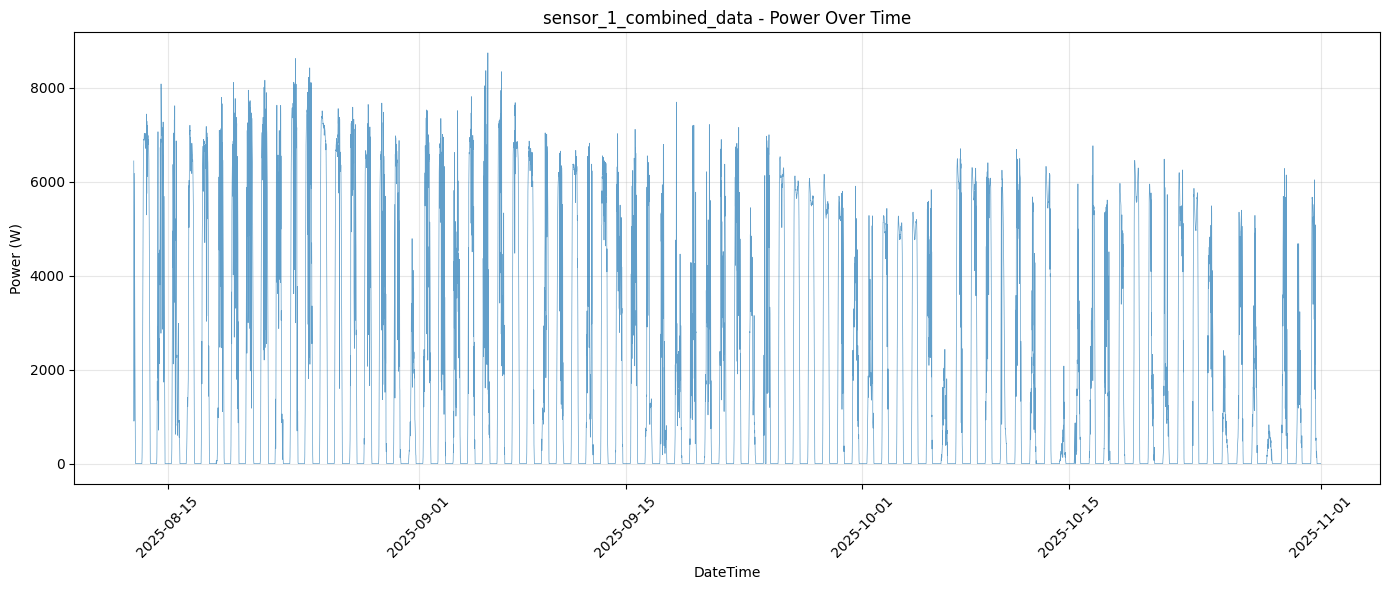

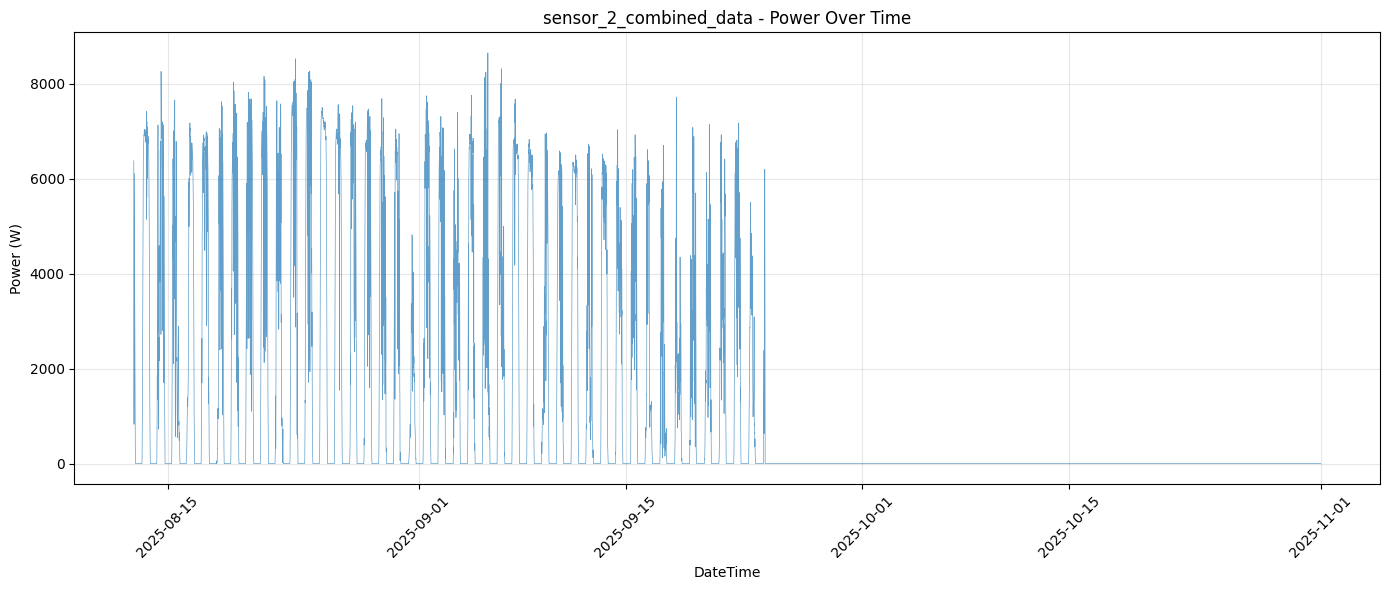

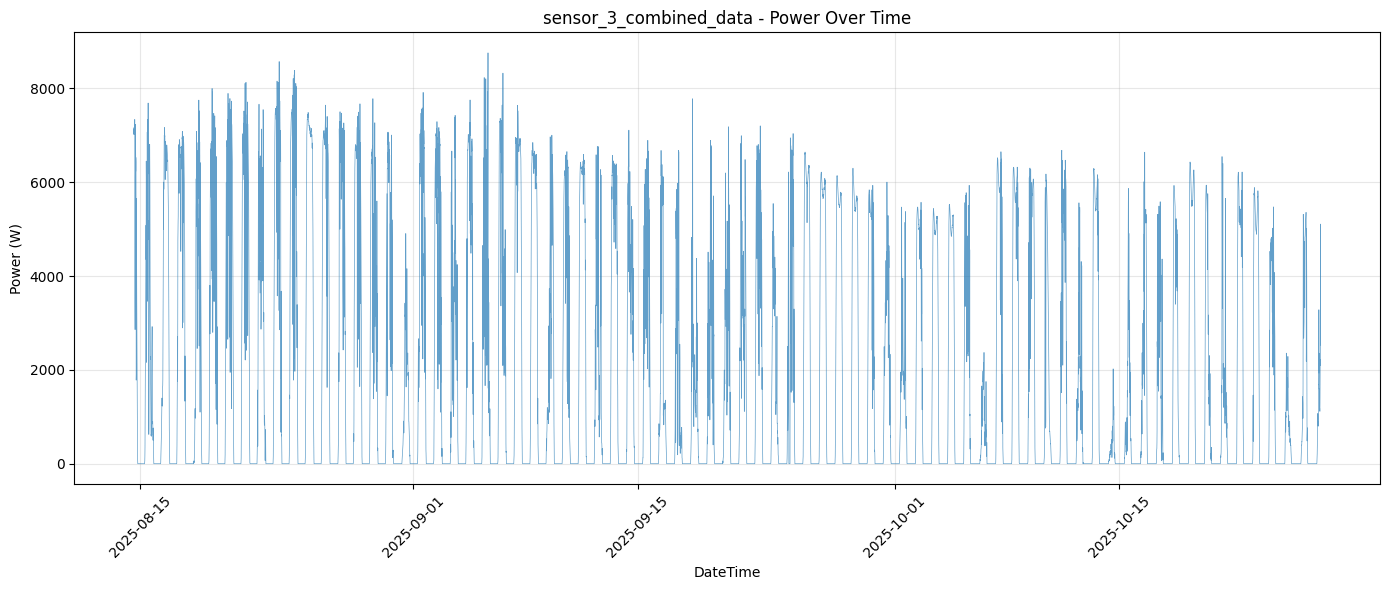

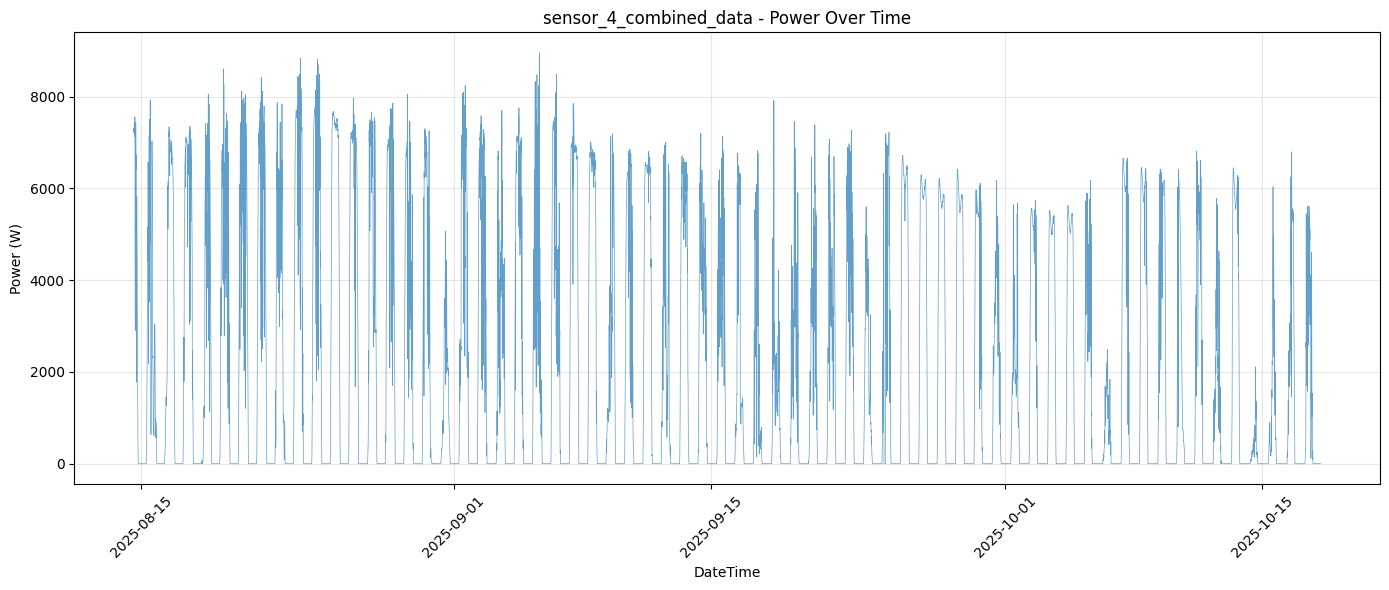

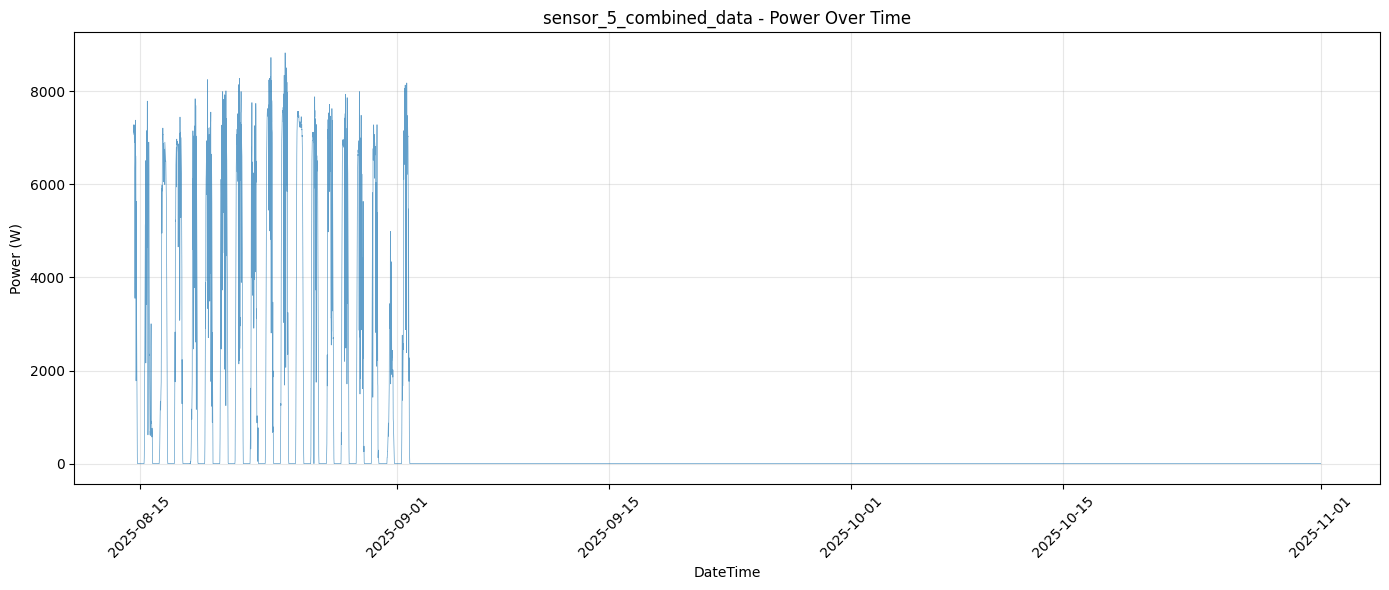

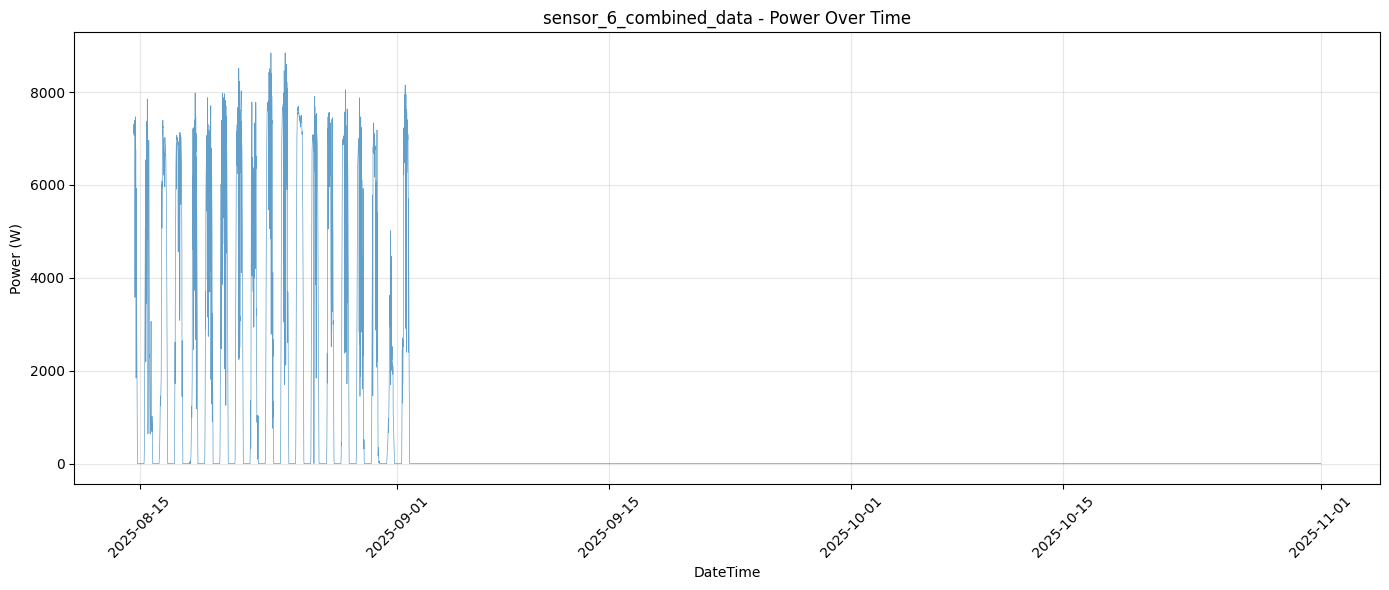

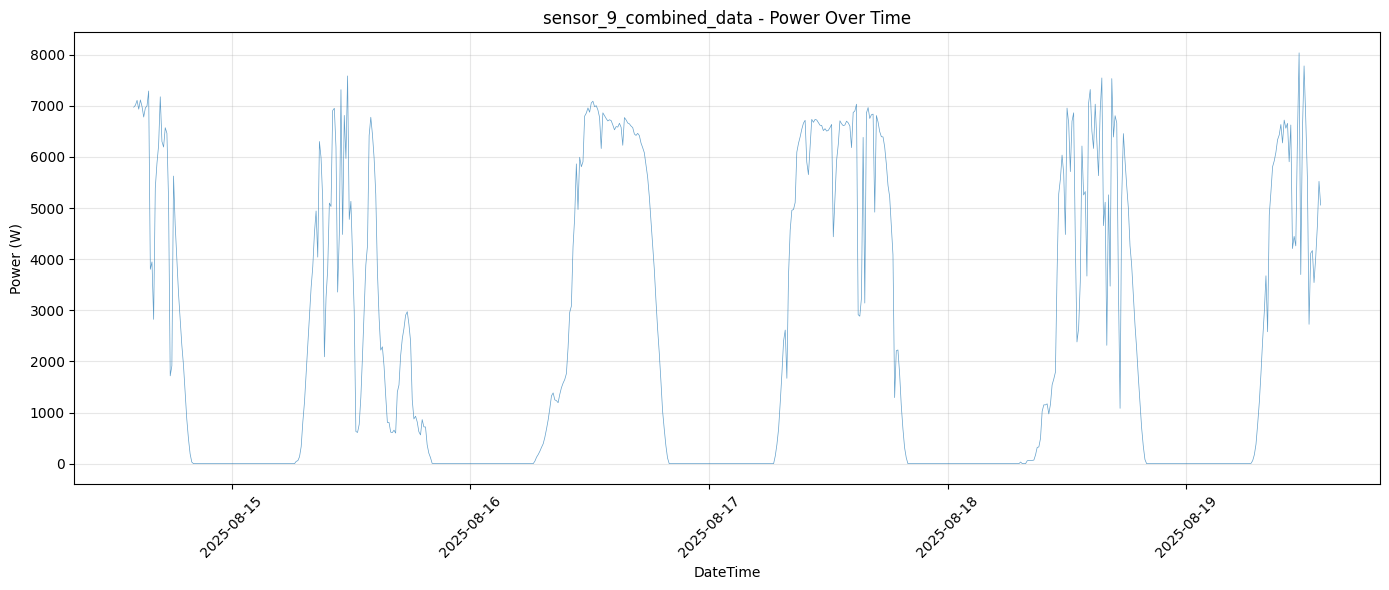

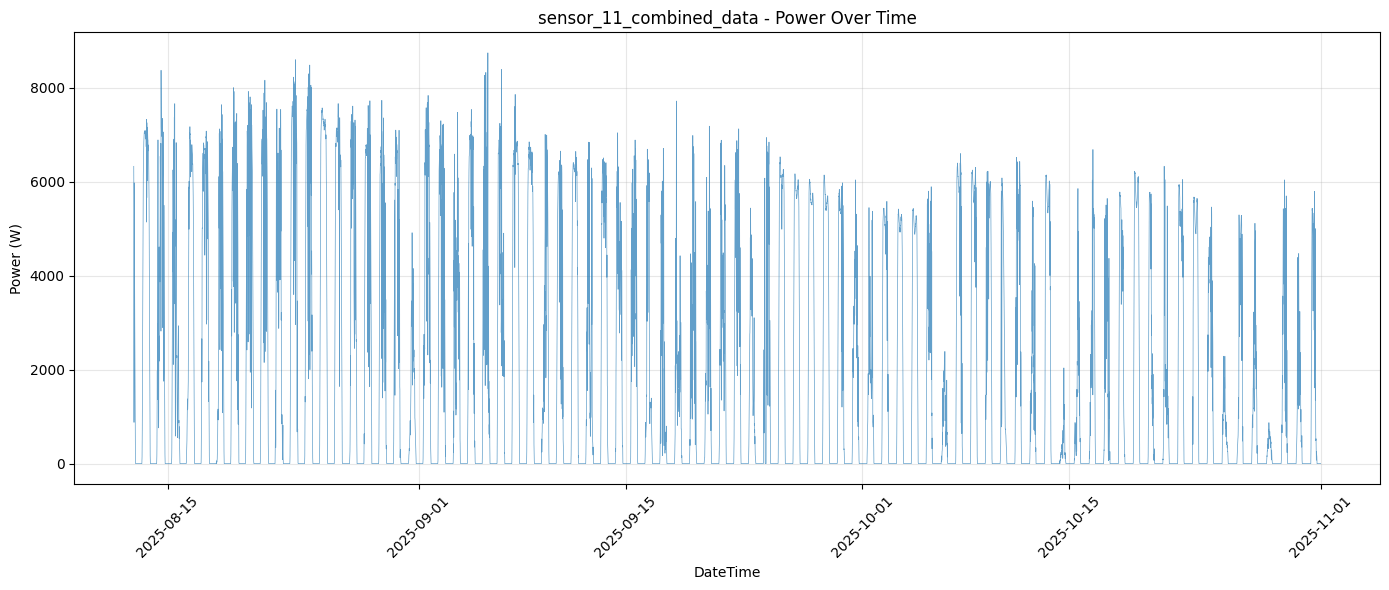

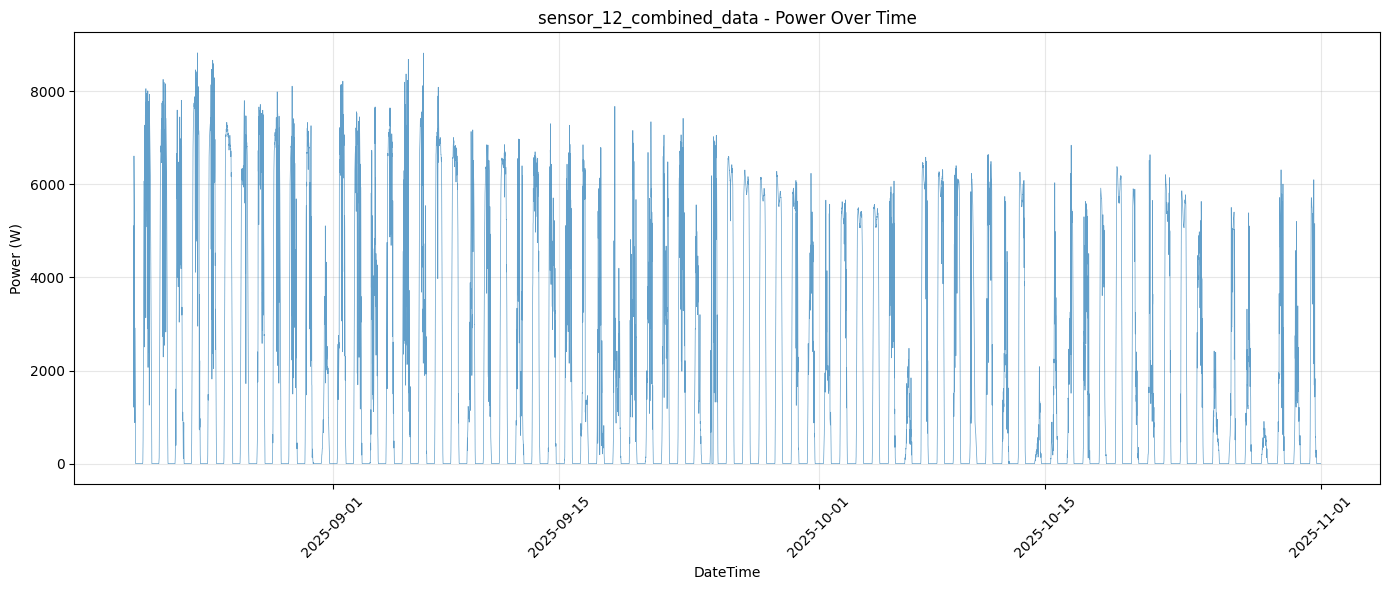

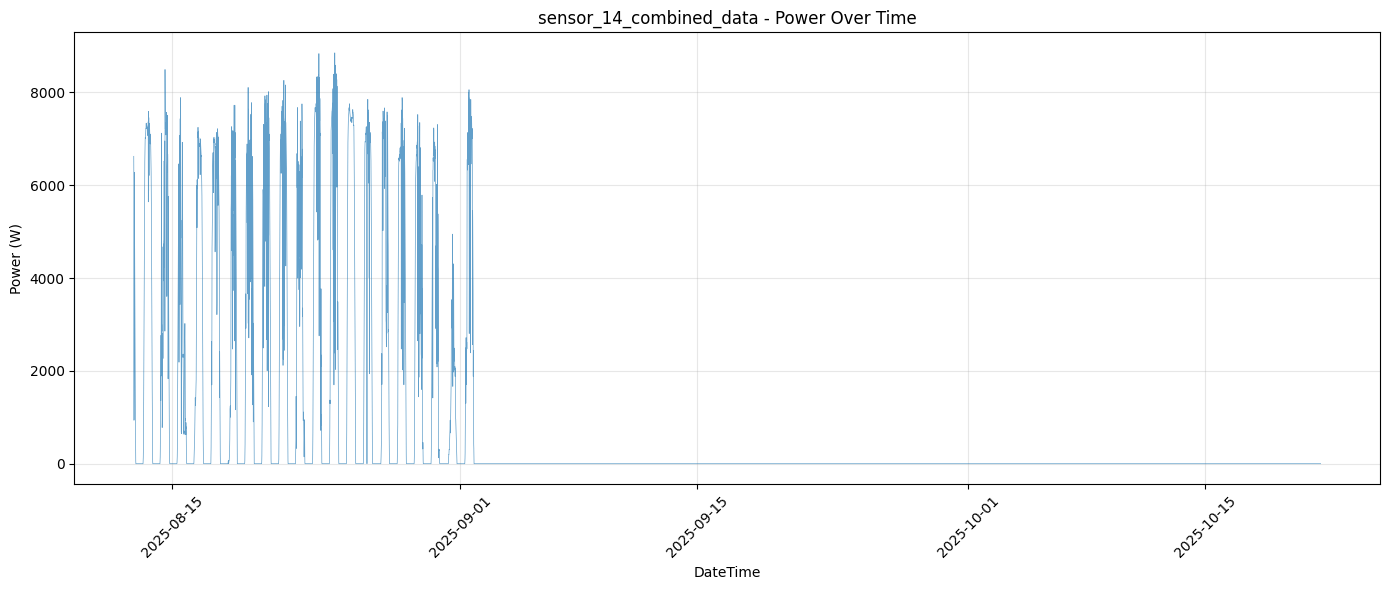

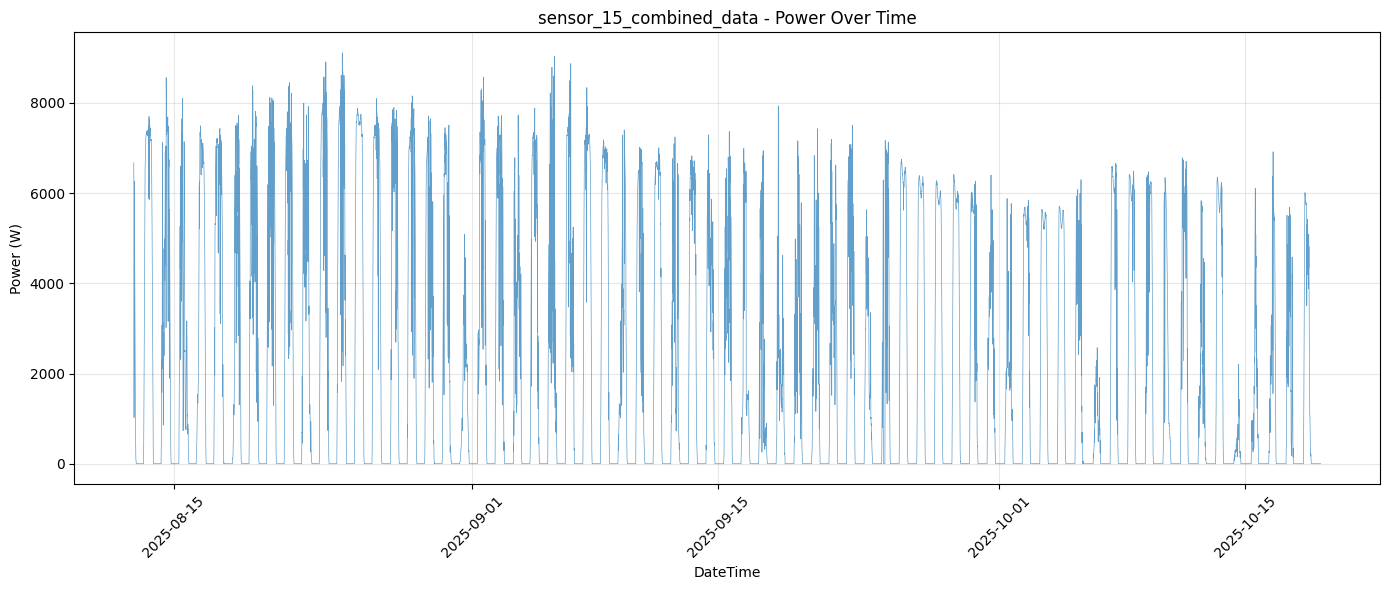

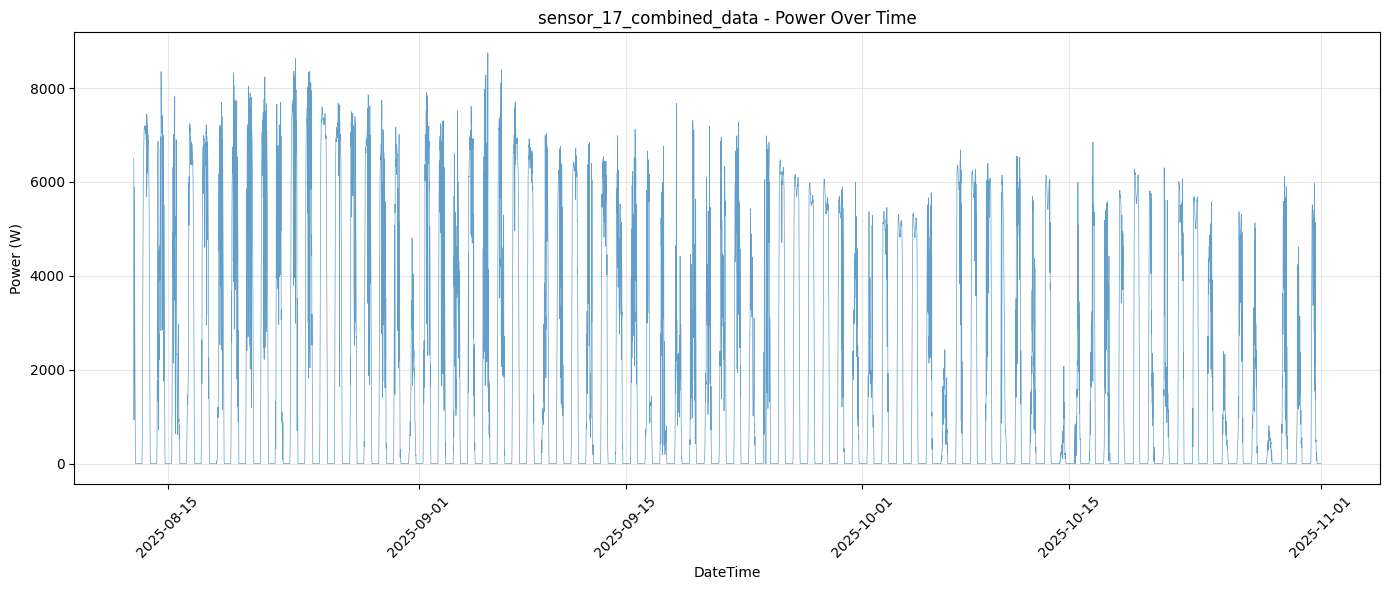

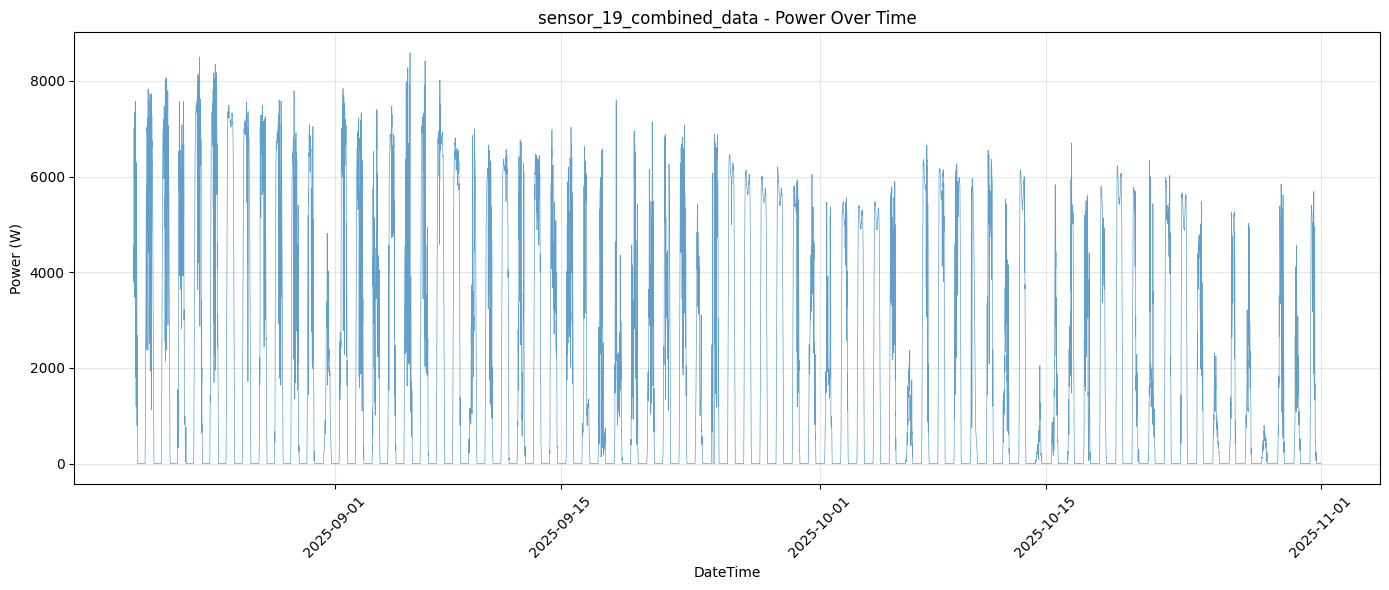

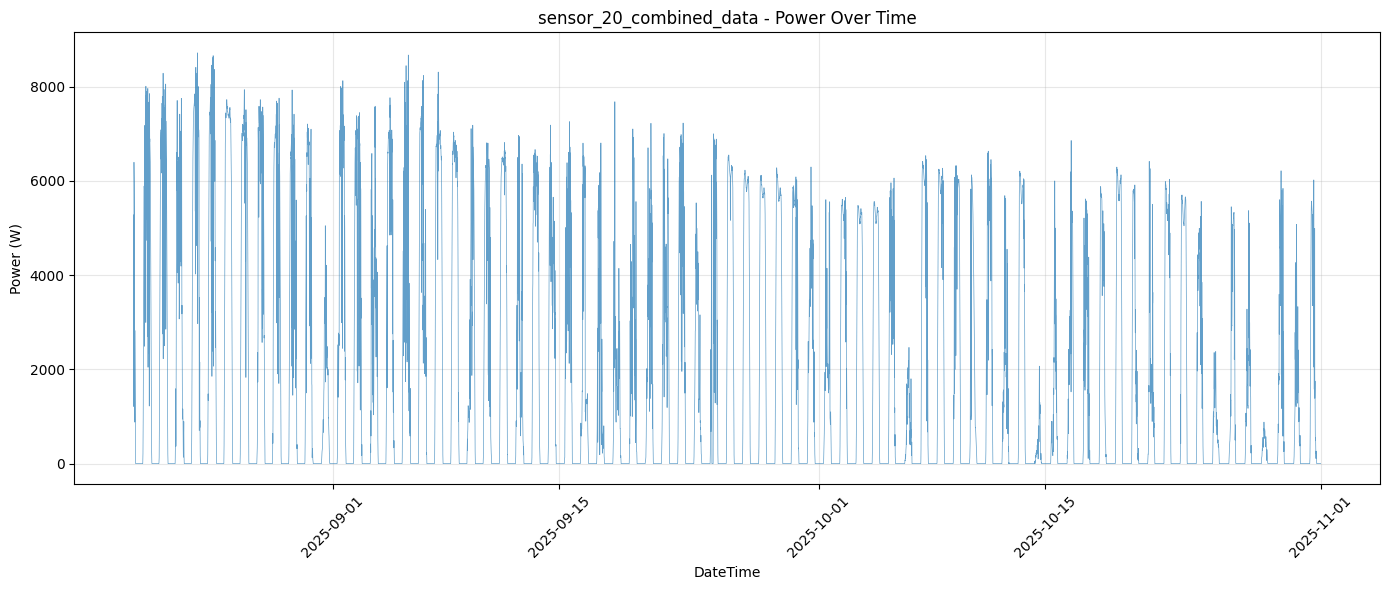

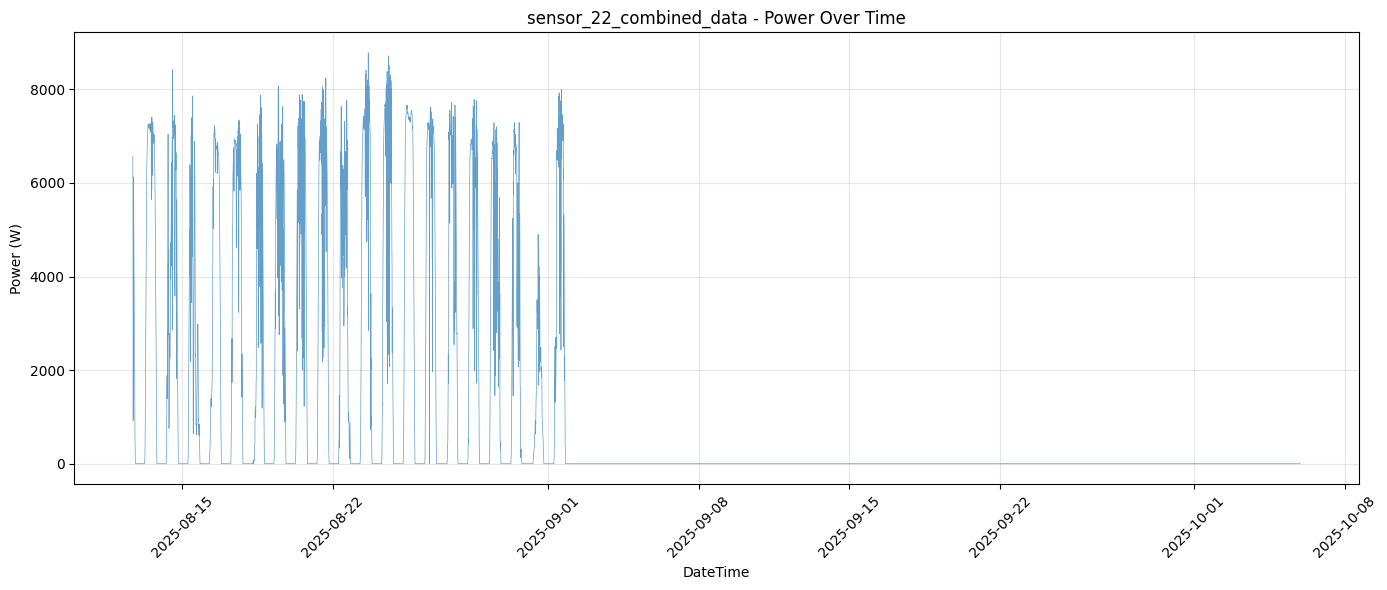

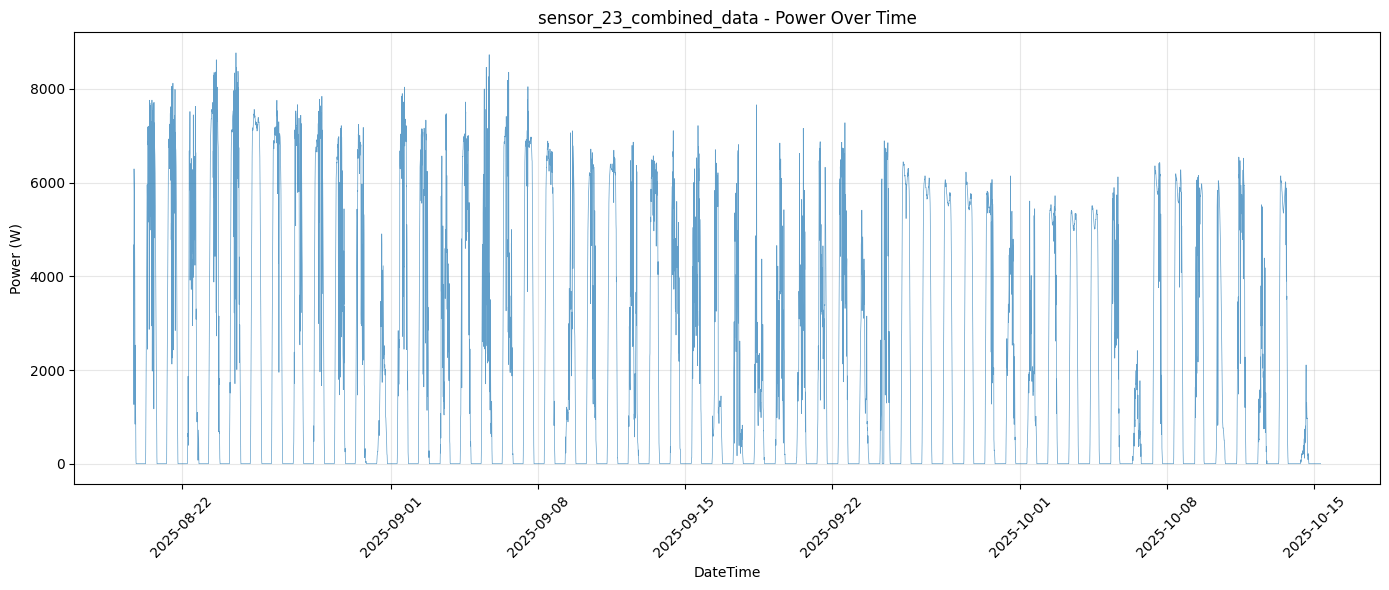

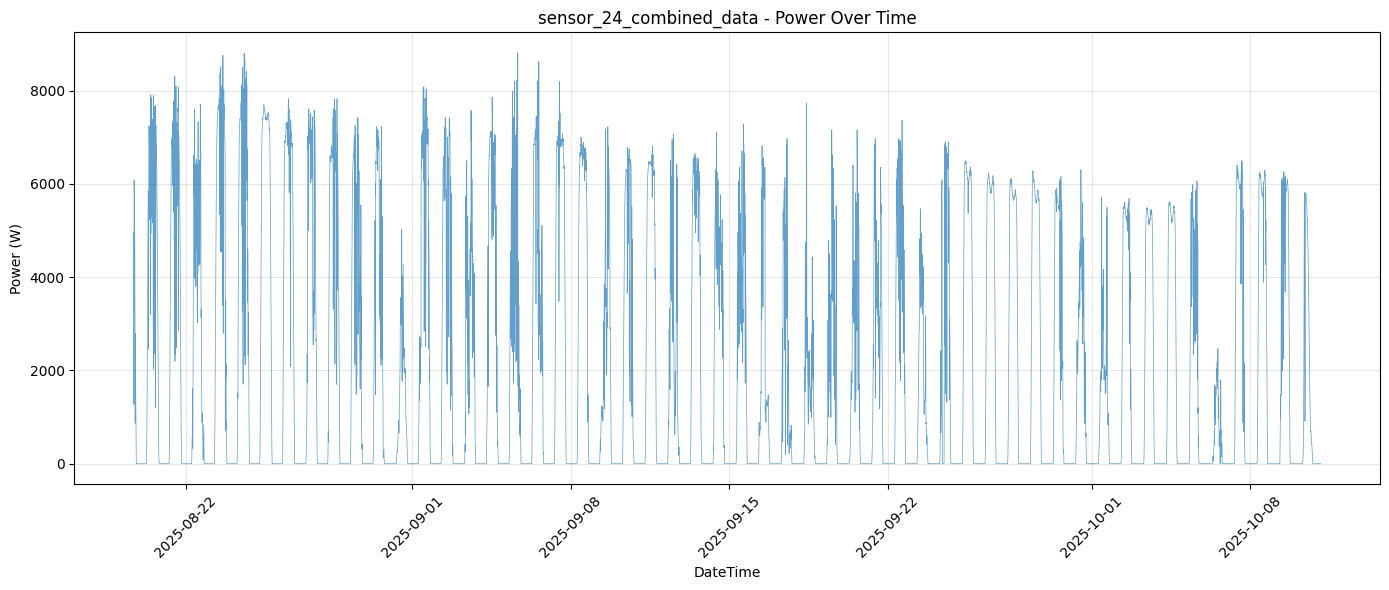

In [10]:
# Plot power column for each sensor file
for xlsx_file in xlsx_files:
    sensor_name = xlsx_file.stem
    
    try:
        # Read the file
        df = pd.read_excel(xlsx_file)
        
        # Check if power_W column exists
        if 'power_W' not in df.columns:
            print(f"⚠️ Skipping {sensor_name}: 'power_W' column not found")
            continue
        
        # Check if datetime column exists and convert it
        if 'datetime' in df.columns:
            df['datetime'] = pd.to_datetime(df['datetime'])
            df = df.sort_values('datetime').reset_index(drop=True)
        
        # Plot the power data
        fig, ax = plt.subplots(1, 1, figsize=(14, 6))
        
        if 'datetime' in df.columns:
            ax.plot(df['datetime'], df['power_W'], linewidth=0.5, alpha=0.7)
            ax.set_xlabel('DateTime')
            ax.tick_params(axis='x', rotation=45)
        else:
            ax.plot(df['power_W'], linewidth=0.5, alpha=0.7)
            ax.set_xlabel('Index')
        
        ax.set_ylabel('Power (W)')
        ax.set_title(f'{sensor_name} - Power Over Time')
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Error processing {sensor_name}: {str(e)}")
